<a href="https://colab.research.google.com/github/pulkit02s/Single-Cell-data-analysis/blob/main/SNV_standard_analysis_pipeline_v2_zeros_labelling_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy
!pip install kneed
!pip install leidenalg

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading data from the previously implemented standard analysis pipeline
results_file = '/content/drive/MyDrive/RESULTS.h5ad'
adata = sc.read(results_file)

# PLOTS

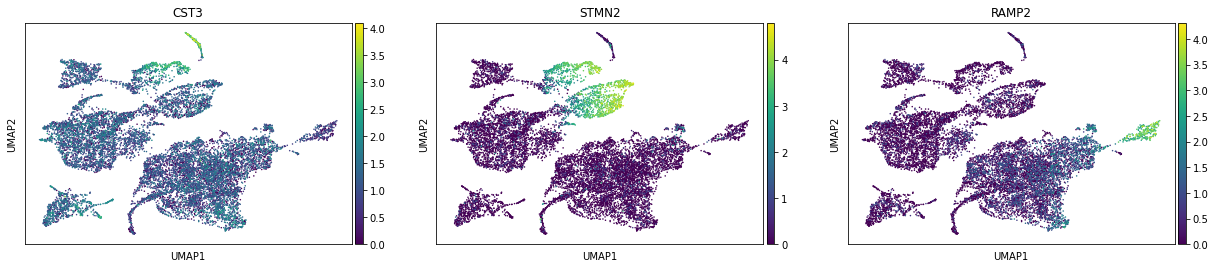

In [4]:
sc.pl.umap(adata, color=['CST3', 'STMN2', 'RAMP2']) #REPLACE/ADD THE NAME OF THE GENE TO VISUALISE ITS GENE EXPRESSION

In [5]:
# sc.tl.tsne(adata, n_pcs = 20)
# sc.pl.tsne(adata, color=['CST3', 'STMN2', 'RAMP2']) #REPLACE/ADD THE NAME OF THE GENE TO VISUALISE ITS GENE EXPRESSION

In [6]:
sc.tl.leiden(adata, resolution = 0.5)

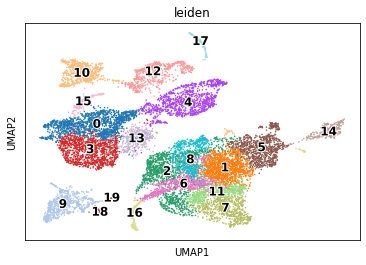

In [7]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2)

In [8]:
sLength = len(adata.obs['leiden'])
adata.obs['mutation'] = np.nan

In [9]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,mutation
AAACCCACAACCGTGC,2215,2215,5933.0,342.0,5.764369,4,NaN
AAACCCACAAGAAATC,4238,4238,16949.0,611.0,3.604933,6,NaN
AAACCCACACGGTGCT,3194,3194,10158.0,607.0,5.975586,16,NaN
AAACCCACAGTTCCAA,4014,4014,11912.0,578.0,4.852250,8,NaN
AAACCCACATGAATCC,2338,2338,6701.0,454.0,6.775108,10,NaN
...,...,...,...,...,...,...,...
TTTGTTGTCAGTGGGA,3937,3937,15506.0,613.0,3.953308,16,NaN
TTTGTTGTCCGTTGAA,2031,2031,4894.0,339.0,6.926849,9,NaN
TTTGTTGTCGCGCTGA,2177,2177,5247.0,484.0,9.224319,0,NaN
TTTGTTGTCGTAGTCA,2107,2107,6175.0,454.0,7.352227,7,NaN


In [10]:
data1=pd.read_csv('/content/drive/MyDrive/filtered1.tsv',sep='\t', index_col = 'SNV')

In [11]:
data1 = data1.T

In [12]:
adata1 = sc.AnnData(data1.loc[adata.obs.index, :])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [13]:
sc.pp.filter_genes(adata1, min_cells=25)

In [14]:
sc.pp.normalize_total(adata1, target_sum=1)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [15]:
adata1.var.index

Index(['1:16650146_C>T', '14:90404784_G>A', '15:65285441_T>C', '16:177464_T>A',
       '16:177467_T>A', '16:177472_T>A', '16:83812046_T>A', '19:12793176_T>A',
       '19:12793181_T>A', '19:58582097_C>T', '19:58582117_G>T',
       '20:31606511_G>A', '20:31606512_T>A', '6:21597819_T>C',
       '6:26104289_T>C', '7:94656369_T>G'],
      dtype='object', name='SNV')

In [16]:
newdata1 = data1.loc[adata.obs.index, :].loc[:, adata1.var.index]

In [17]:
newdata1

SNV,1:16650146_C>T,14:90404784_G>A,15:65285441_T>C,16:177464_T>A,16:177467_T>A,16:177472_T>A,16:83812046_T>A,19:12793176_T>A,19:12793181_T>A,19:58582097_C>T,19:58582117_G>T,20:31606511_G>A,20:31606512_T>A,6:21597819_T>C,6:26104289_T>C,7:94656369_T>G
AAACCCACAACCGTGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAAGAAATC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACACGGTGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAGTTCCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACATGAATCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCAGTGGGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCCGTTGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCGCGCTGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCGTAGTCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
s = csr_matrix(newdata1.values)
s

<12931x16 sparse matrix of type '<class 'numpy.float64'>'
	with 781 stored elements in Compressed Sparse Row format>

In [19]:
print(s)

  (18, 15)	1.0
  (24, 3)	0.789916
  (24, 4)	0.628571
  (24, 5)	0.802198
  (42, 9)	1.0
  (82, 6)	1.0
  (123, 9)	1.0
  (123, 10)	1.0
  (126, 0)	0.125
  (144, 6)	1.0
  (156, 15)	1.0
  (158, 15)	1.0
  (159, 7)	0.4
  (159, 9)	1.0
  (159, 10)	1.0
  (172, 15)	1.0
  (179, 11)	0.333333
  (179, 12)	0.4
  (185, 15)	1.0
  (192, 15)	1.0
  (208, 14)	0.25
  (217, 8)	0.6
  (236, 15)	1.0
  (239, 0)	0.142857
  (244, 13)	1.0
  :	:
  (12399, 12)	0.8
  (12418, 15)	1.0
  (12452, 8)	0.333333
  (12538, 11)	0.4
  (12568, 0)	1.0
  (12569, 15)	1.0
  (12591, 2)	1.0
  (12592, 15)	1.0
  (12657, 6)	0.833333
  (12754, 15)	1.0
  (12800, 15)	1.0
  (12817, 6)	0.4
  (12826, 3)	0.625
  (12826, 4)	0.630435
  (12826, 5)	0.795918
  (12834, 3)	0.645833
  (12834, 4)	0.644444
  (12834, 5)	0.820513
  (12847, 7)	0.4
  (12847, 8)	0.4
  (12863, 8)	0.5
  (12872, 9)	1.0
  (12872, 10)	1.0
  (12877, 7)	0.166667
  (12896, 1)	0.142857


In [20]:
temp = [((i, j), s[i,j]) for i, j in zip(*s.nonzero())]

In [21]:
adata.obs.columns.get_loc('mutation')

6

In [22]:
for ele in temp:
  # adata.obs.iloc[ele[0][0], adata.obs.columns.get_loc('mutation')] = adata1.var.index[ele[0][1]]
  adata.obs.iloc[ele[0][0], adata.obs.columns.get_loc('mutation')] = ele[0][1].astype(str)
  # print(ele)

# A CELL WITH MORE THAN ONE NUMBER OF MUTATIONS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [23]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,mutation
AAACCCACAACCGTGC,2215,2215,5933.0,342.0,5.764369,4,NaN
AAACCCACAAGAAATC,4238,4238,16949.0,611.0,3.604933,6,NaN
AAACCCACACGGTGCT,3194,3194,10158.0,607.0,5.975586,16,NaN
AAACCCACAGTTCCAA,4014,4014,11912.0,578.0,4.852250,8,NaN
AAACCCACATGAATCC,2338,2338,6701.0,454.0,6.775108,10,NaN
...,...,...,...,...,...,...,...
TTTGTTGTCAGTGGGA,3937,3937,15506.0,613.0,3.953308,16,NaN
TTTGTTGTCCGTTGAA,2031,2031,4894.0,339.0,6.926849,9,NaN
TTTGTTGTCGCGCTGA,2177,2177,5247.0,484.0,9.224319,0,NaN
TTTGTTGTCGTAGTCA,2107,2107,6175.0,454.0,7.352227,7,NaN


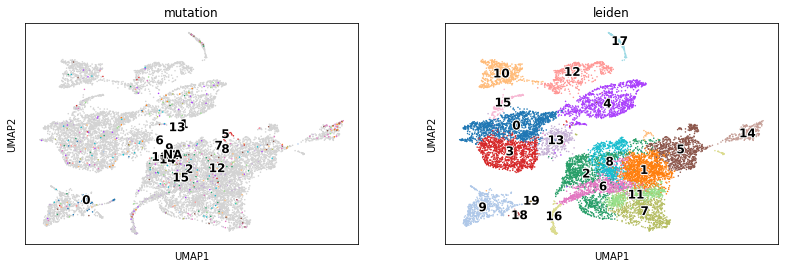

In [24]:
sc.pl.umap(adata, color=['mutation', 'leiden'], legend_loc='on data', 
               legend_fontsize=12, legend_fontoutline=2)

In [25]:
markers = adata1.var.index
markers.tolist()

['1:16650146_C>T',
 '14:90404784_G>A',
 '15:65285441_T>C',
 '16:177464_T>A',
 '16:177467_T>A',
 '16:177472_T>A',
 '16:83812046_T>A',
 '19:12793176_T>A',
 '19:12793181_T>A',
 '19:58582097_C>T',
 '19:58582117_G>T',
 '20:31606511_G>A',
 '20:31606512_T>A',
 '6:21597819_T>C',
 '6:26104289_T>C',
 '7:94656369_T>G']

In [26]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,mutation
AAACCCACAACCGTGC,2215,2215,5933.0,342.0,5.764369,4,NaN
AAACCCACAAGAAATC,4238,4238,16949.0,611.0,3.604933,6,NaN
AAACCCACACGGTGCT,3194,3194,10158.0,607.0,5.975586,16,NaN
AAACCCACAGTTCCAA,4014,4014,11912.0,578.0,4.852250,8,NaN
AAACCCACATGAATCC,2338,2338,6701.0,454.0,6.775108,10,NaN
...,...,...,...,...,...,...,...
TTTGTTGTCAGTGGGA,3937,3937,15506.0,613.0,3.953308,16,NaN
TTTGTTGTCCGTTGAA,2031,2031,4894.0,339.0,6.926849,9,NaN
TTTGTTGTCGCGCTGA,2177,2177,5247.0,484.0,9.224319,0,NaN
TTTGTTGTCGTAGTCA,2107,2107,6175.0,454.0,7.352227,7,NaN


In [27]:
adata1.obs = adata.obs[['leiden', 'mutation']].copy()

In [28]:
adata1.obs

,leiden,mutation
AAACCCACAACCGTGC,4,NaN
AAACCCACAAGAAATC,6,NaN
AAACCCACACGGTGCT,16,NaN
AAACCCACAGTTCCAA,8,NaN
AAACCCACATGAATCC,10,NaN
...,...,...
TTTGTTGTCAGTGGGA,16,NaN
TTTGTTGTCCGTTGAA,9,NaN
TTTGTTGTCGCGCTGA,0,NaN
TTTGTTGTCGTAGTCA,7,NaN


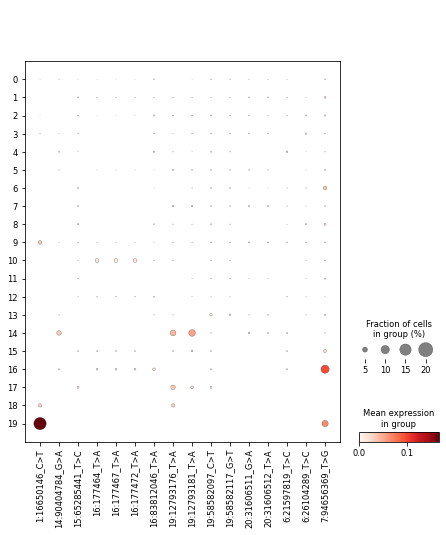

In [29]:
sc.pl.dotplot(adata1, markers, groupby='leiden');
#this is the "contribution" of mutations in clusters BASED ON GENE EXPRSSION (we've copied the SAME leiden column)
#WE COULD HAVE also plotted the "contribution" of mutations in clusters BASED ON mutations only

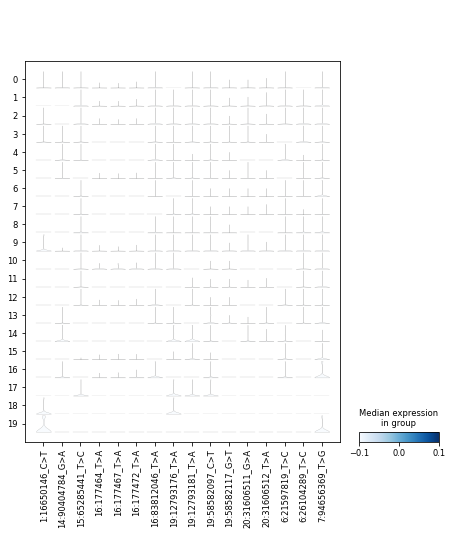

In [30]:
sc.pl.stacked_violin(adata1, markers, groupby='leiden', rotation=90);